## EDA

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
df=pd.read_csv('covid19_Confirmed_dataset[1].csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
#delete redudant datas
df = df.drop(['Lat', 'Long'], axis=1)

In [4]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
corona_aggregated = df.groupby("Country/Region").sum()

In [6]:
corona_aggregated.shape

(187, 101)

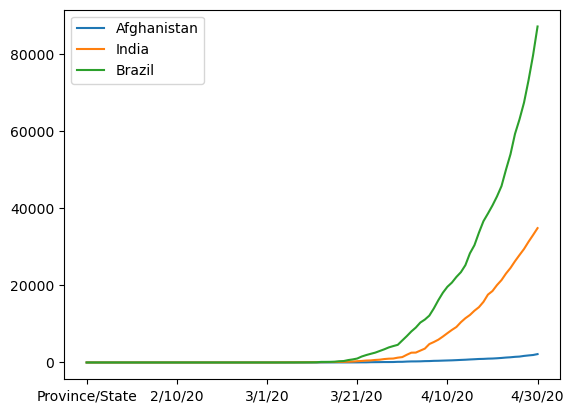

In [7]:
#Visualize
corona_aggregated.loc["Afghanistan"].plot()
corona_aggregated.loc["India"].plot()
corona_aggregated.loc["Brazil"].plot()
plt.legend()

<Axes: >

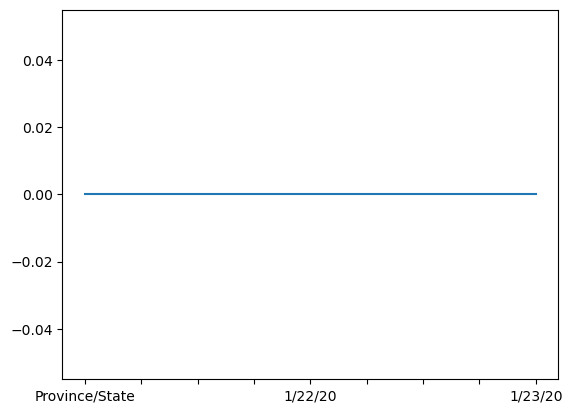

In [8]:
#Calculate good measure
corona_aggregated.loc["Brazil"][:3].plot()

<Axes: >

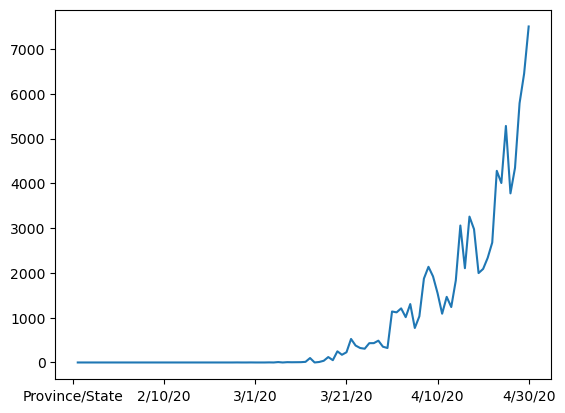

In [9]:
corona_aggregated.loc["Brazil"].diff().plot()

In [10]:
#maximum infection rate
corona_aggregated.loc["Brazil"].diff().max()

7502

In [11]:
corona_aggregated.loc["India"].diff().max()

1893

In [12]:
df_numeric = df.drop(['Province/State', 'Country/Region'], axis=1)

# Convert all columns to numeric
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Handle null values (fill with 0 or appropriate value)
df_numeric = df_numeric.fillna(0)

# Check the first few rows to ensure data is clean
print(df_numeric.head())

# List of countries
countries = df['Country/Region'].unique()

# Initialize a list to store max infection rates
max_infection_rates = []

# Calculate the max infection rate for each country
for country in countries:
    if country in df['Country/Region'].values:
        country_data = df[df['Country/Region'] == country].drop(['Province/State', 'Country/Region'], axis=1).sum()
        max_infection_rates.append(country_data.diff().max())

# Add the calculated maximum infection rates to the DataFrame
max_infection_rates_df = pd.DataFrame({
    'Country/Region': countries,
    'Max_Infected_Rate': max_infection_rates
})

# Print the max infection rates DataFrame
print(max_infection_rates_df)

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  \
0        0        0  ...     1092     1176     1279     1351     1463   
1        0        0  ...      609      634      663      678      712   
2        0        0  ...     2811     2910     3007     3127     3256   
3        0        0  ...      717      723      723      731      738   
4        0        0  ...       24       25       25       25       25   

   4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0     1531     1703     1828     1939     2171  


In [13]:
# Drop non-numeric columns and pivot the table to have dates as index and countries as columns
corona_aggregated = df.drop(['Province/State'], axis=1).groupby('Country/Region').sum().T

# Convert all columns to numeric
corona_aggregated = corona_aggregated.apply(pd.to_numeric, errors='coerce')

# Handle null values by filling with 0
corona_aggregated = corona_aggregated.fillna(0)

# List of countries
countries = corona_aggregated.columns

# Initialize a dictionary to store max infection rates
max_infection_rates = {}

# Calculate the max infection rate for each country
for country in countries:
    max_infection_rates[country] = corona_aggregated[country].diff().max()

# Create a new DataFrame for max infection rates
max_infection_rates_df = pd.DataFrame(list(max_infection_rates.items()), columns=['Country/Region', 'Max_Infected_Rate'])

# Merge the max infection rates DataFrame with the original DataFrame
corona_aggregated = corona_aggregated.T
corona_aggregated = corona_aggregated.merge(max_infection_rates_df, left_index=True, right_on='Country/Region')

# Move 'Country/Region' to the first column
cols = corona_aggregated.columns.tolist()
cols = cols[-2:] + cols[:-2]  # Move the last two columns to the front
corona_aggregated = corona_aggregated[cols]

# Display the updated DataFrame
corona_aggregated

,Country/Region,Max_Infected_Rate,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,232.0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,34.0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,199.0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,43.0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,5.0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,66.0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
183,Western Sahara,4.0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
184,Yemen,5.0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
185,Zambia,9.0,0,0,0,0,0,0,0,0,...,70,74,76,84,84,88,88,95,97,106


In [14]:
#create a new dataframe
corona_data=pd.DataFrame(df['Country/Region'],corona_aggregated['Max_Infected_Rate'])

In [15]:
corona_data

,Country/Region
Max_Infected_Rate,
232.0,Dominica
34.0,Cameroon
199.0,Somalia
43.0,Canada
5.0,Antigua and Barbuda
...,...
66.0,China
4.0,Angola
5.0,Antigua and Barbuda


In [16]:
happiness_report = pd.read_csv('worldwide_happiness_report[1].csv')
happiness_report.drop(['Overall rank', 'Score', 'Perceptions of corruption', 'Generosity'], axis=1, inplace=True)
happiness_report.set_index('Country or region', inplace=True)

# Ensure that both datasets have the same countries
corona_aggregated.set_index('Country/Region', inplace=True)
corona_data = corona_aggregated[['Max_Infected_Rate']]

# Join the datasets
data = corona_data.join(happiness_report, how='inner')

# Display the resulting DataFrame
print(data.head())

             Max_Infected_Rate  GDP per capita  Social support  \
Afghanistan              232.0           0.350           0.517   
Albania                   34.0           0.947           0.848   
Algeria                  199.0           1.002           1.160   
Argentina                291.0           1.092           1.432   
Armenia                  134.0           0.850           1.055   

             Healthy life expectancy  Freedom to make life choices  
Afghanistan                    0.361                         0.000  
Albania                        0.874                         0.383  
Algeria                        0.785                         0.086  
Argentina                      0.881                         0.471  
Armenia                        0.815                         0.283  


In [17]:
data.corr()

,Max_Infected_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_Infected_Rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


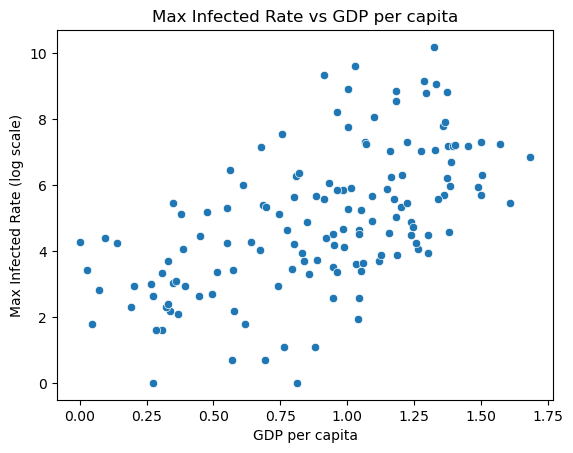

In [18]:
# Plotting
x = data['GDP per capita']
y = data['Max_Infected_Rate']

# Use seaborn scatterplot with keyword arguments
sns.scatterplot(x=x, y=np.log(y))

plt.xlabel('GDP per capita')
plt.ylabel('Max Infected Rate (log scale)')
plt.title('Max Infected Rate vs GDP per capita')
plt.show()

<Axes: xlabel='GDP per capita', ylabel='Max_Infected_Rate'>

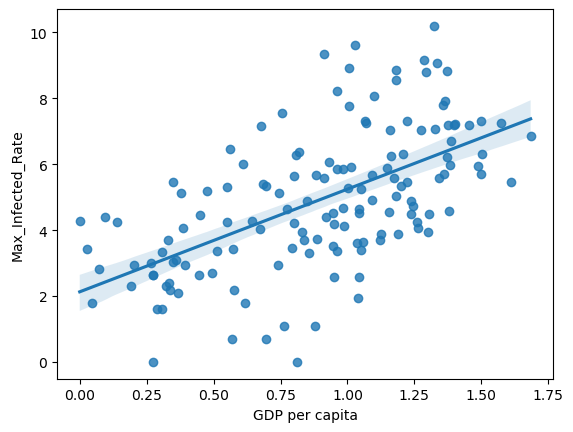

In [19]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_Infected_Rate'>

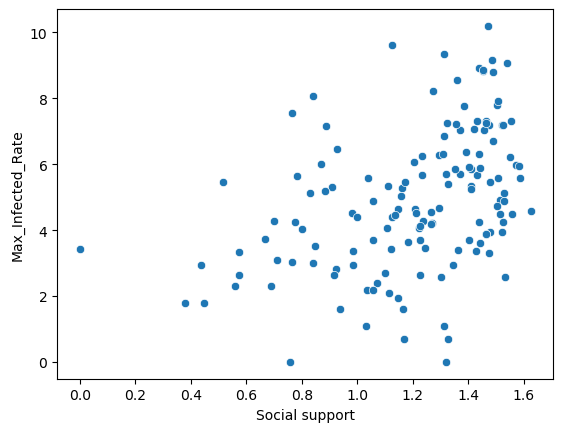

In [20]:
# Plotting
x = data['Social support']
y = data['Max_Infected_Rate']

# Use seaborn scatterplot with keyword arguments
sns.scatterplot(x=x, y=np.log(y))


<Axes: xlabel='Social support', ylabel='Max_Infected_Rate'>

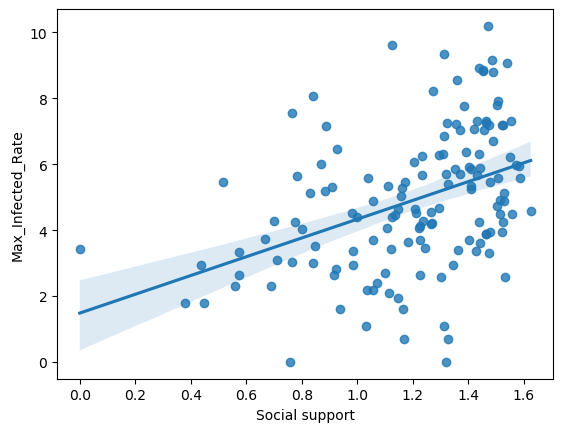

In [21]:
sns.regplot(x=x, y=np.log(y))


<Axes: xlabel='Healthy life expectancy', ylabel='Max_Infected_Rate'>

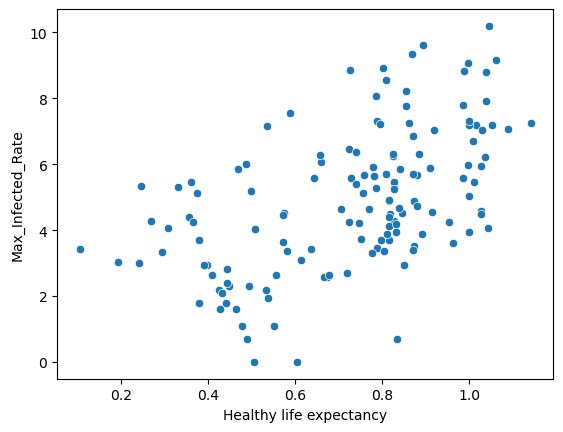

In [22]:
# Plotting
x = data['Healthy life expectancy']
y = data['Max_Infected_Rate']

# Use seaborn scatterplot with keyword arguments
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_Infected_Rate'>

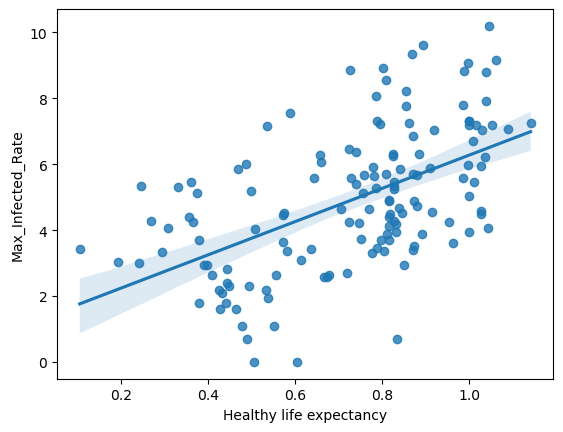

In [23]:
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_Infected_Rate'>

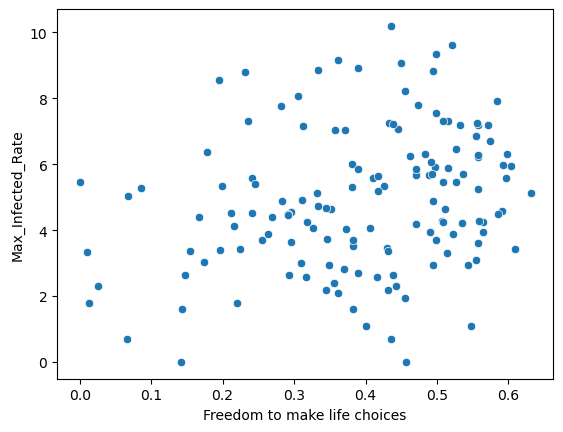

In [24]:
# Plotting
x = data['Freedom to make life choices']
y = data['Max_Infected_Rate']

# Use seaborn scatterplot with keyword arguments
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_Infected_Rate'>

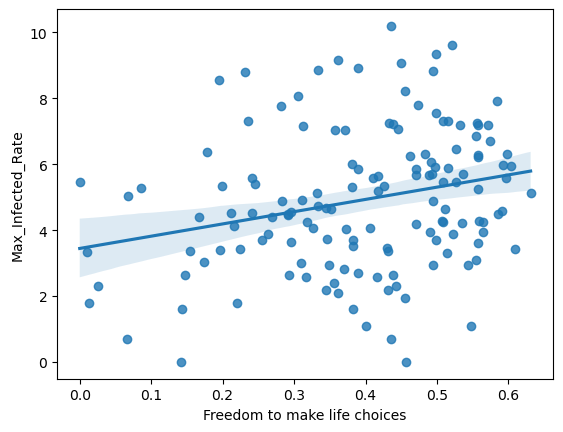

In [25]:
sns.regplot(x=x, y=np.log(y))